In [98]:
import numpy as np
import grid_world_class as gw
import UCRL2_L as ucrl
import UCRL_SMDP as ucrlS
import experiment_utils as utils
import importlib
importlib.reload(gw)
importlib.reload(ucrl)
importlib.reload(ucrlS)
importlib.reload(utils)
import matplotlib.pyplot as plt

In [99]:
env_smdp = gw.grid_world(nS=400, T_max=6)
env_ucrl = gw.grid_world(nS=400, T_max=1)
ucrl_naive = ucrl.UCRL2(nS=400, nA = 4, delta = 0.05)
smdp_ucrl = ucrlS.UCRL_SMDP(nS = 400, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=1/2, sigma_tau=5/2 ,r_max=1,tau_min=1, tau_max=5)

In [100]:
_, _, _, gstar = utils.VI(env_ucrl)
_, _, _, gstar_smdp = utils.VI(env_smdp)

In [101]:
reward_ucrl,tau_ucrl = utils.run_experiment(env_ucrl, ucrl_naive, T = 10**6)
reward_sucrl,tau_sucrl = utils.run_experiment(env_smdp, smdp_ucrl, T = 10**6)

In [84]:
print(np.mean(reward_sucrl),
np.mean(reward_ucrl)
)

0.042477 0.003105


In [90]:
regret_ucrl = utils.calc_regret(reward=reward_ucrl, tau = tau_ucrl, optimal_gain=gstar)
regret_sucrl = utils.calc_regret(reward=reward_sucrl, tau = tau_sucrl, optimal_gain=gstar)

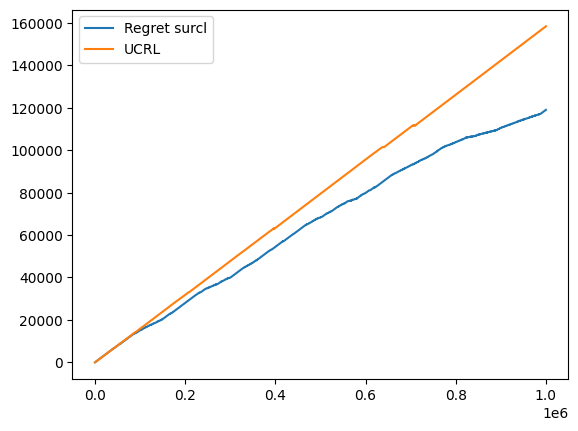

In [92]:
plt.plot(regret_sucrl, label = "Regret surcl")
plt.plot(regret_ucrl, label = "UCRL")
plt.legend()

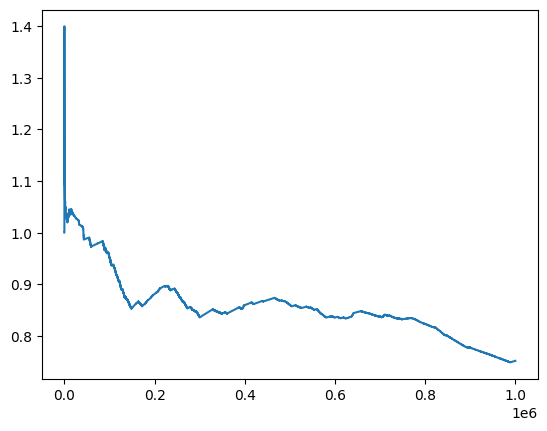

In [93]:
plt.plot(regret_sucrl/regret_ucrl)